## 1. Importação dos dados e pacotes

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/content/CC GENERAL.csv')

df.drop(['CUST_ID'], axis=1, inplace=True)

## 2. Tratamento, estatísticas descritivas e visualização dos dados

In [3]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
cols = ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

for col in cols:

  df[col].fillna(df[col].min(), inplace = True)

### 2.1 Histograma dos dados



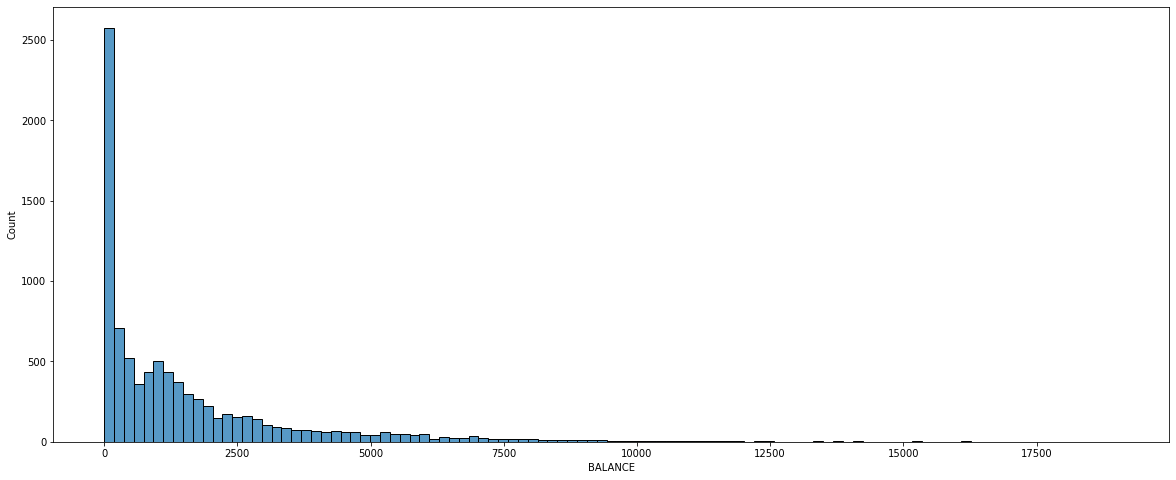

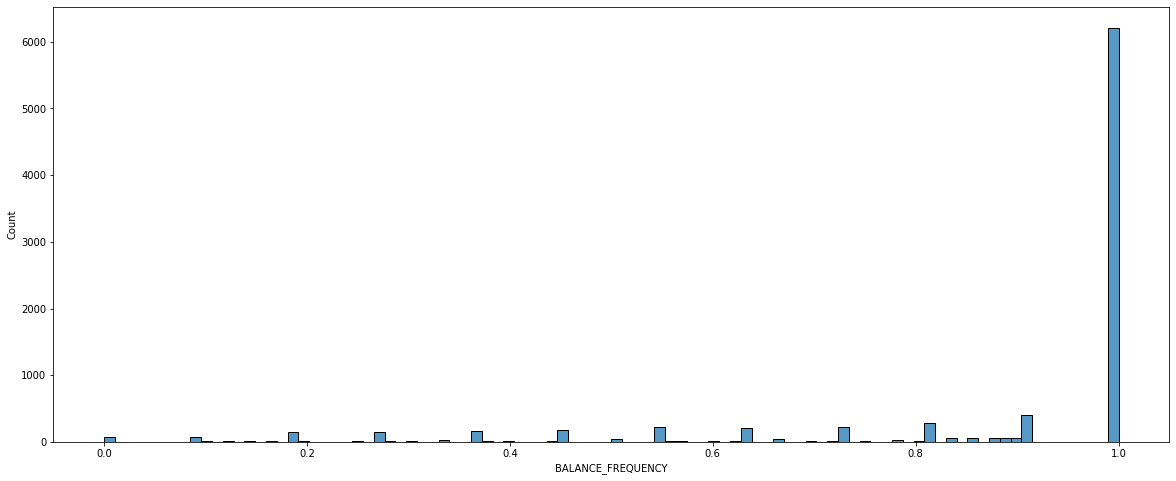

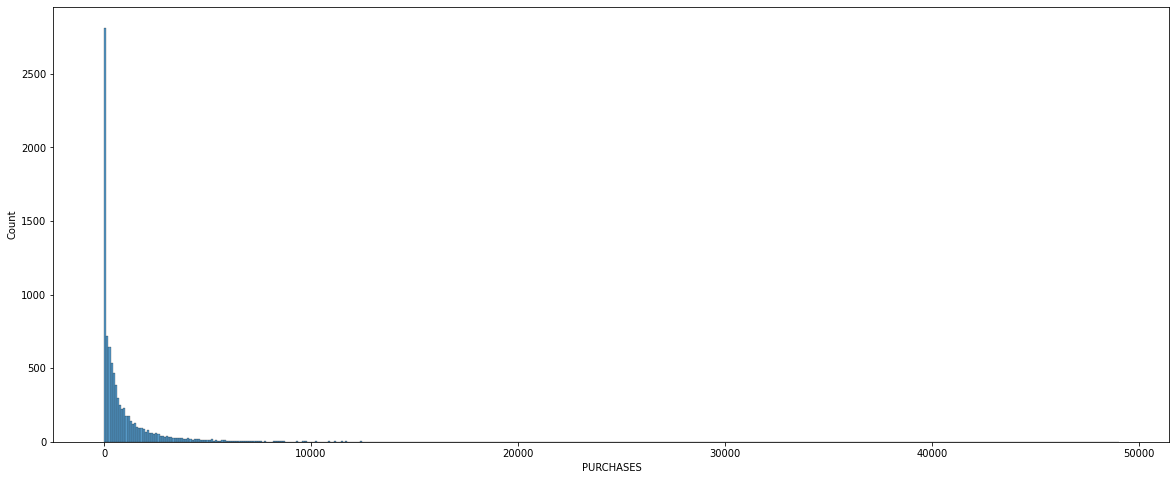

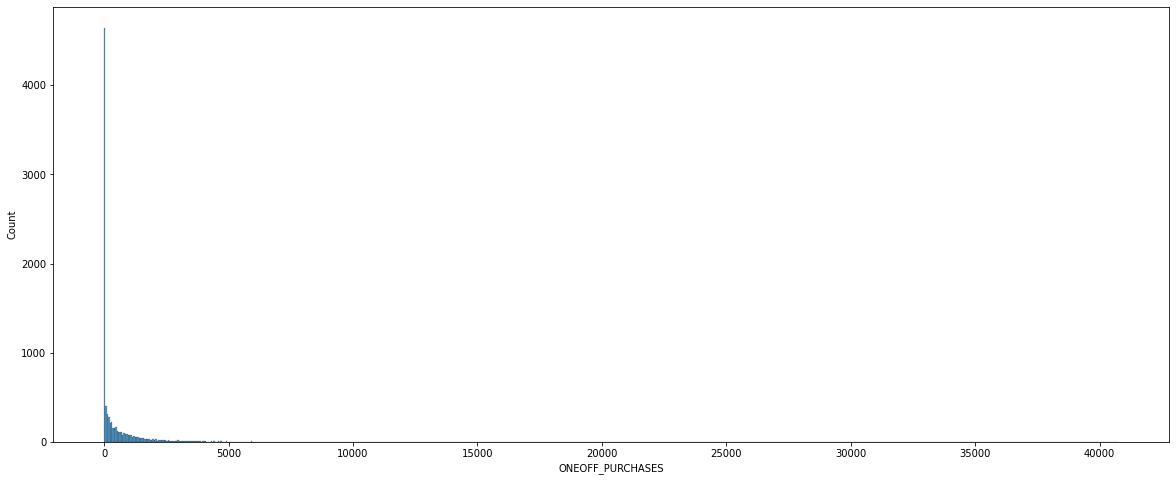

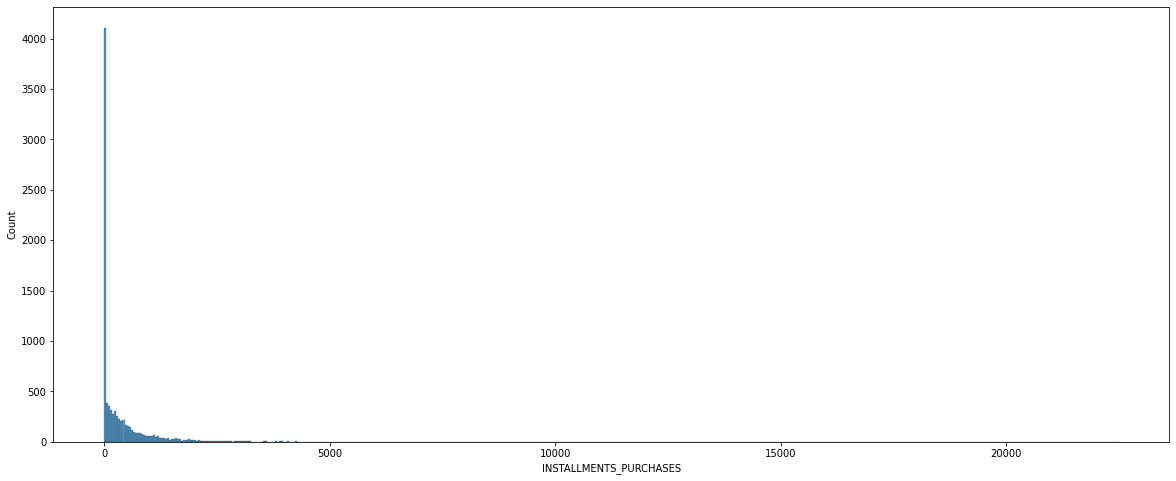

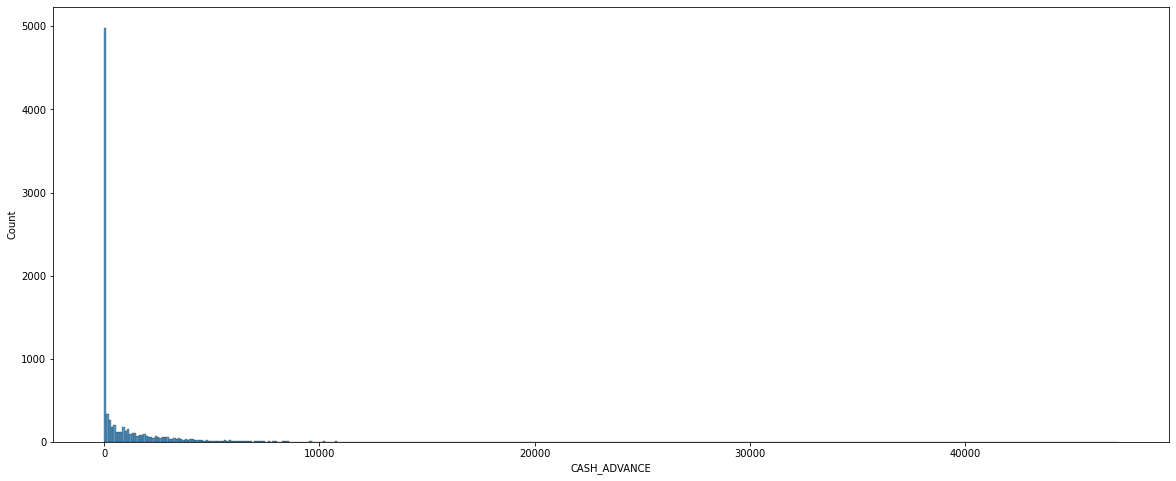

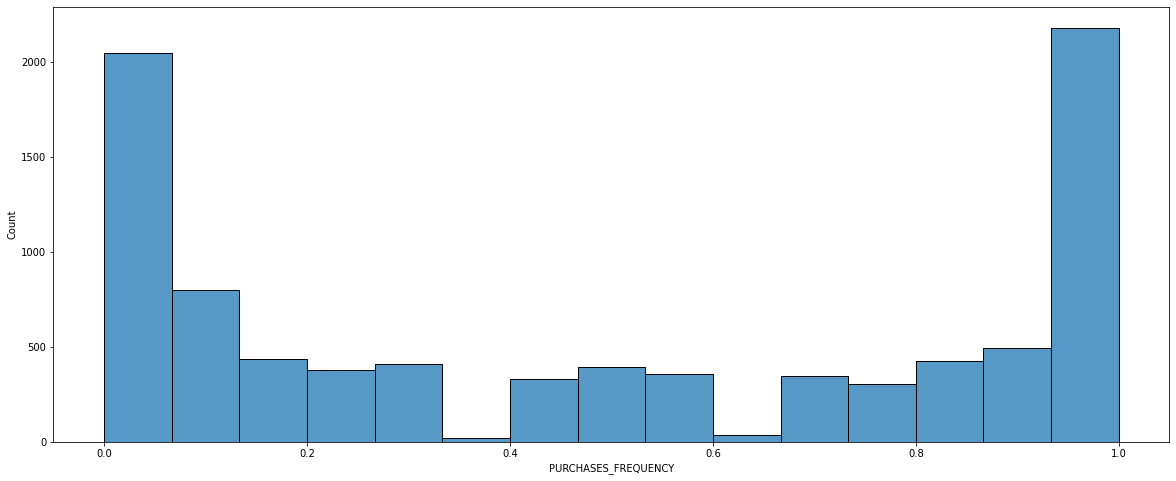

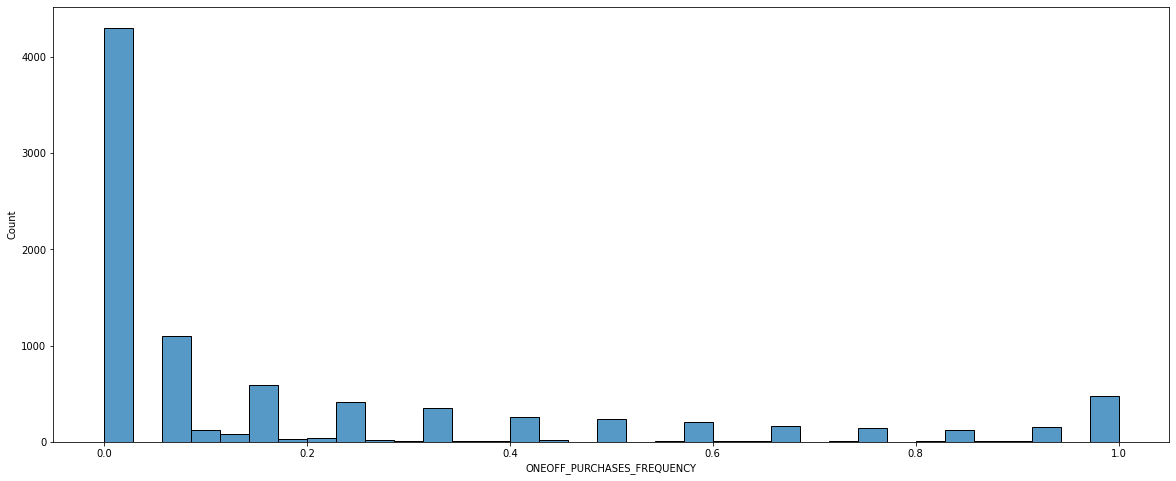

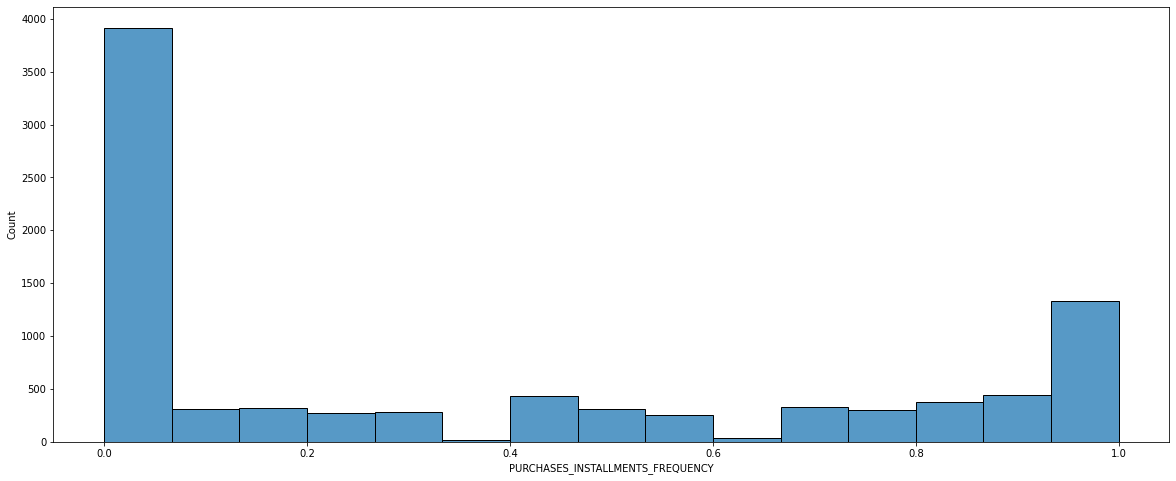

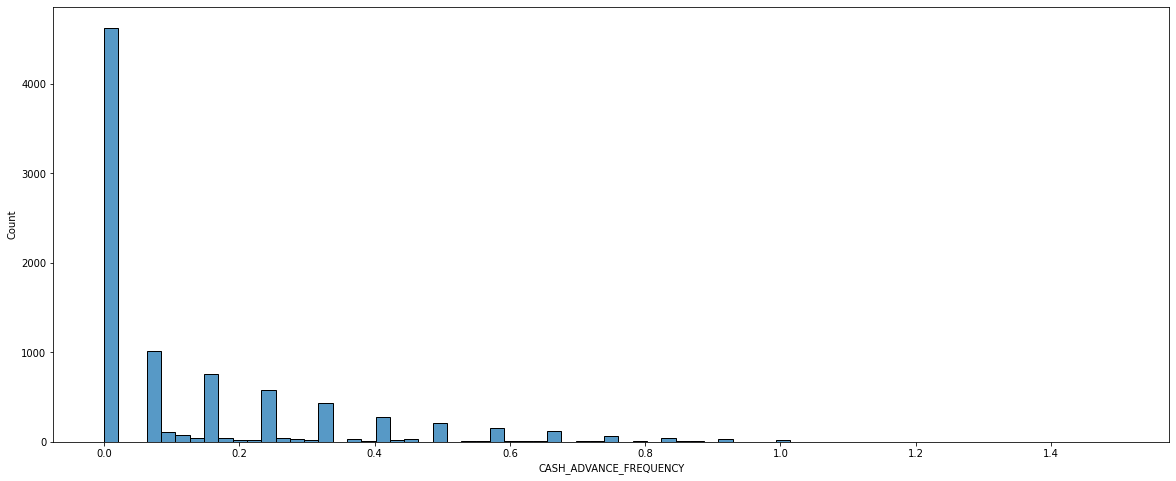

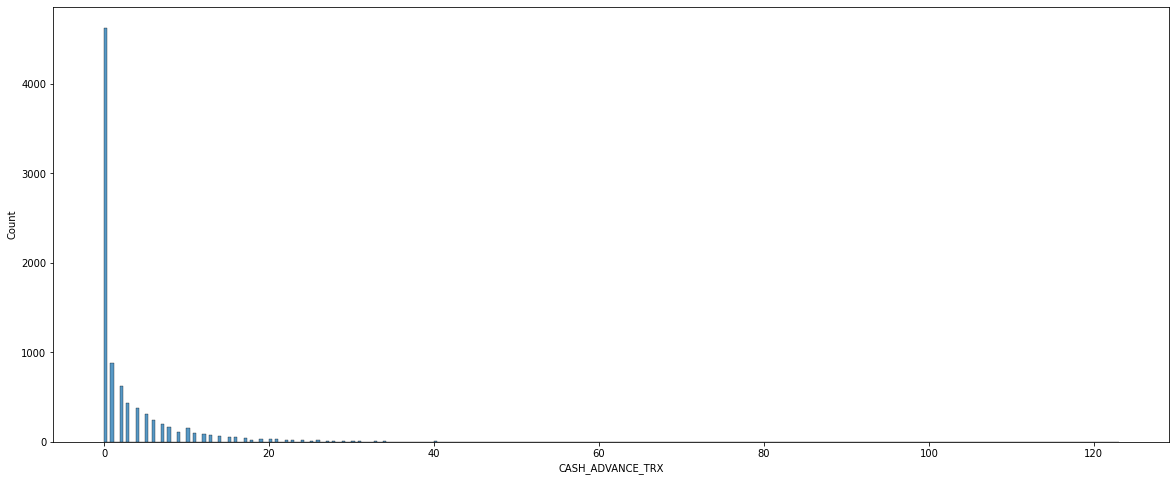

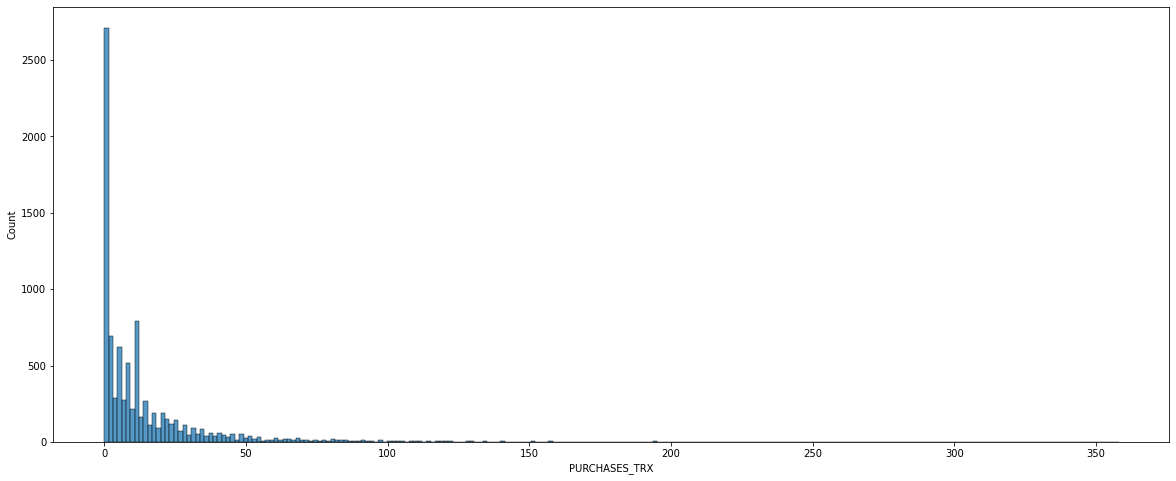

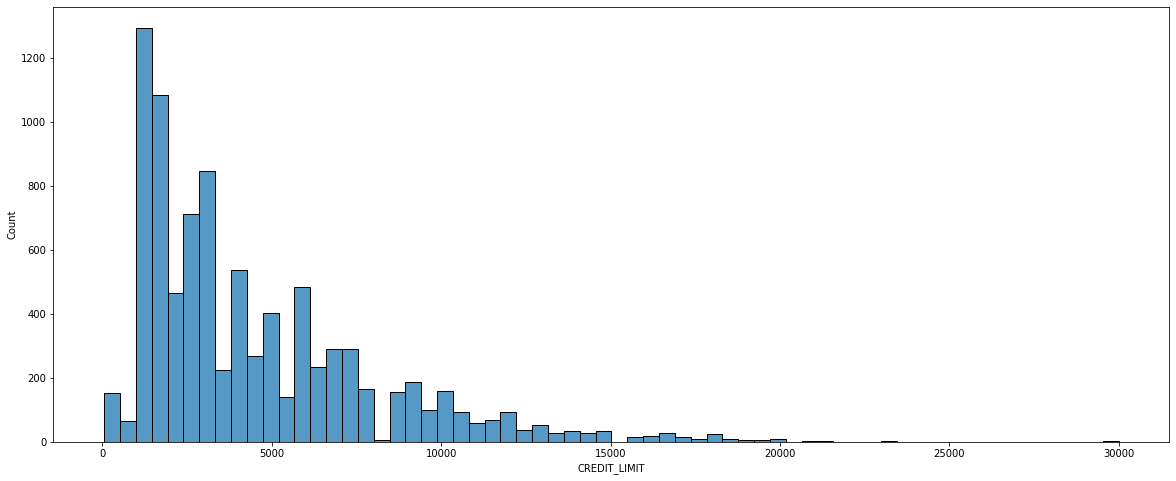

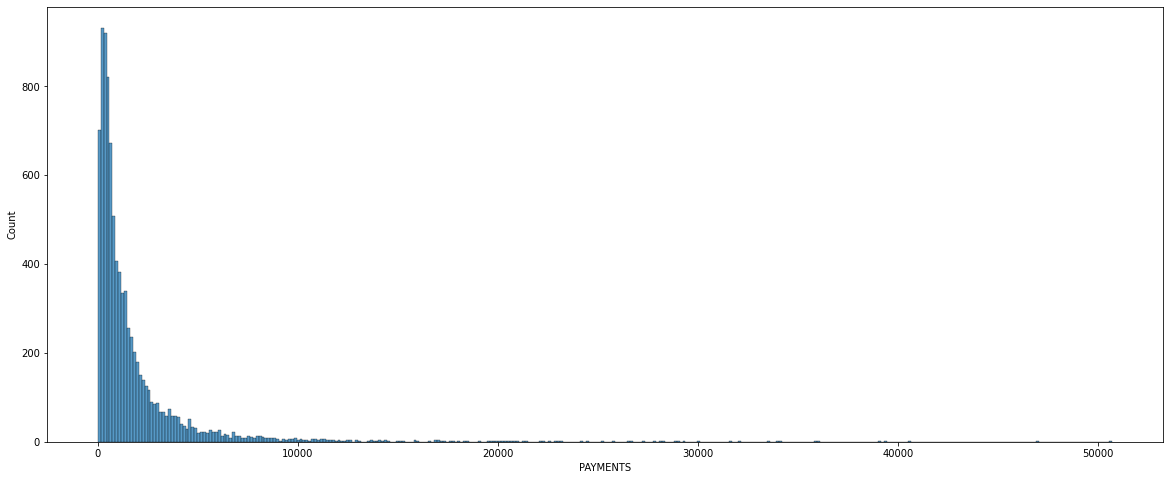

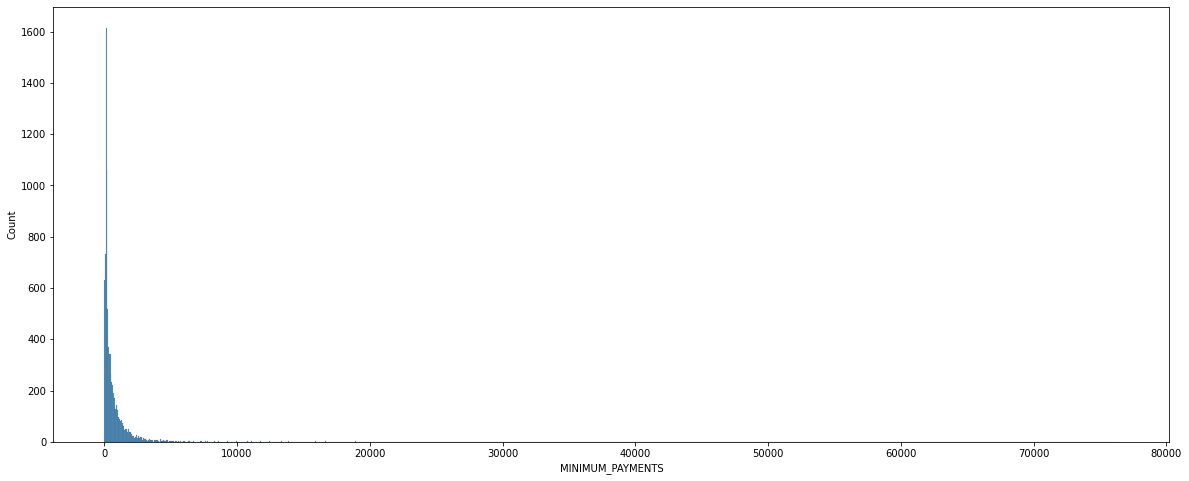

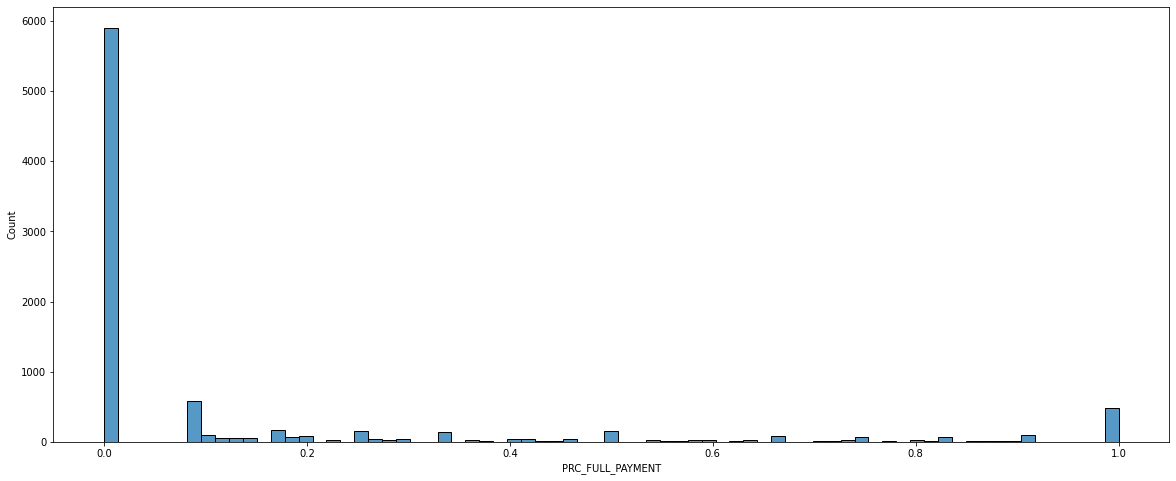

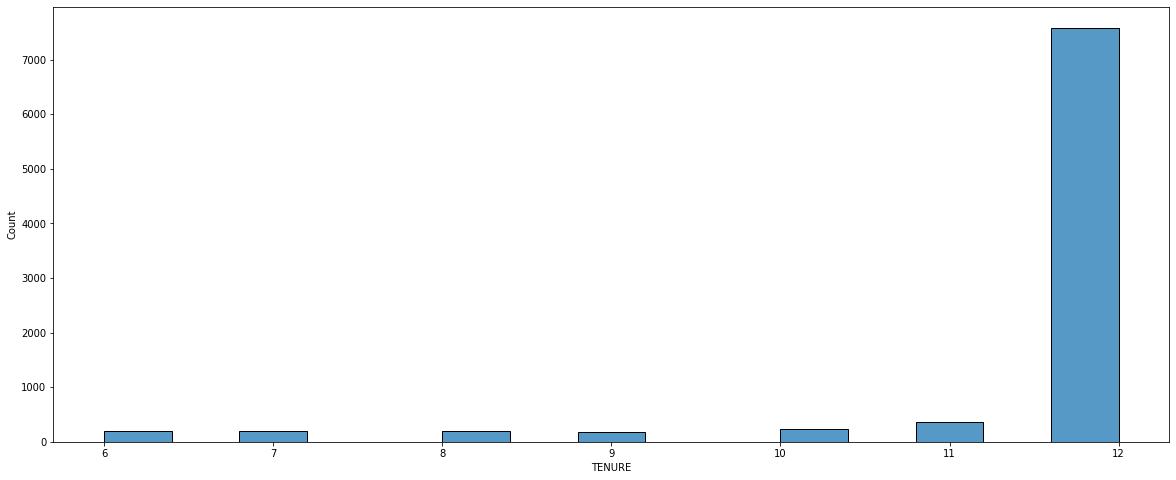

In [6]:
for col in df.columns:
   
  fig = plt.figure(figsize = (20,8))
  sns.histplot(x=col, data=df)
  plt.show

### 2.2 Matriz de correlação

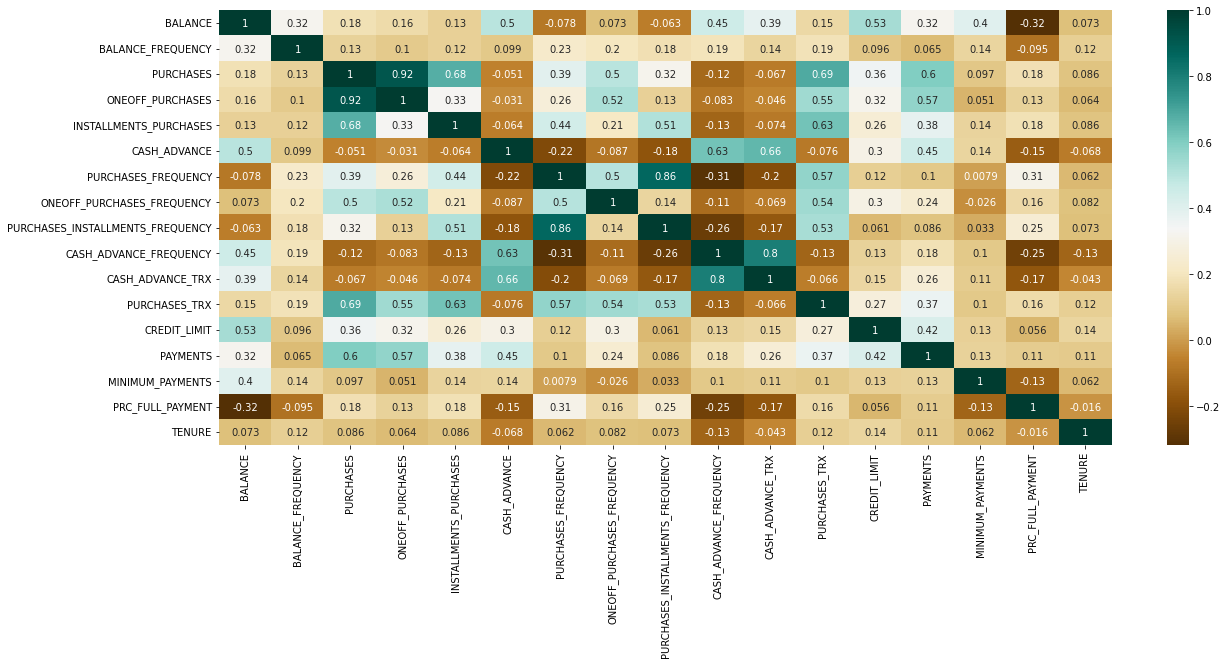

In [7]:
fig = plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True,cmap='BrBG')
plt.show()

### 2.3 Tratamento de outliers

O critério que utilizaremos será selecionar somente até o percentil 95 dos dados de algumas colunas.

In [8]:
out =  ['BALANCE', 'PURCHASES', 'MINIMUM_PAYMENTS', 'PAYMENTS', 'CREDIT_LIMIT', 
        'PURCHASES_TRX', 'ONEOFF_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX']

for col in out:
  
  df1 = df[df[col] < df[col].quantile(.95)]

In [9]:
df1.describe() 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000
mean,1431.199113,0.872347,1011.961018,595.805803,416.467940,742.152673,0.498183,0.203095,0.371415,0.107514,2.051769,14.798703,4377.615346,1588.320186,790.084584,0.159329,11.521226
std,1949.324184,0.241239,2150.647344,1670.591673,910.820691,1550.345886,0.400681,0.299854,0.398614,0.159491,3.262619,24.712727,3599.719439,2617.751583,2345.491202,0.297886,1.336885
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,113.085335,0.857143,49.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,367.523675,159.196974,0.000000,12.000000
50%,789.394118,1.000000,372.000000,37.575000,97.325000,0.000000,0.500000,0.083333,0.200000,0.000000,0.000000,7.000000,3000.000000,806.875687,266.969426,0.000000,12.000000
75%,1859.491408,1.000000,1123.460000,585.450000,477.097500,891.028901,0.916667,0.289286,0.750000,0.166667,3.000000,17.000000,6000.000000,1778.141481,717.641440,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,26268.699890,1.000000,1.000000,1.000000,1.250000,14.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### 2.4 Standarização dos dados

In [10]:
scaler = StandardScaler()

normalized_df = scaler.fit_transform(df1)

## 3. Clusterização - 1ª etapa

### 3.1  Método do cotovelo para seleção do número de clusters

In [11]:
inertias = []
K = range(1, 10)
from scipy.spatial.distance import cdist
for k in K:
    
    kmeanModel = KMeans(n_clusters=k).fit(normalized_df)
    inertias.append(kmeanModel.inertia_)

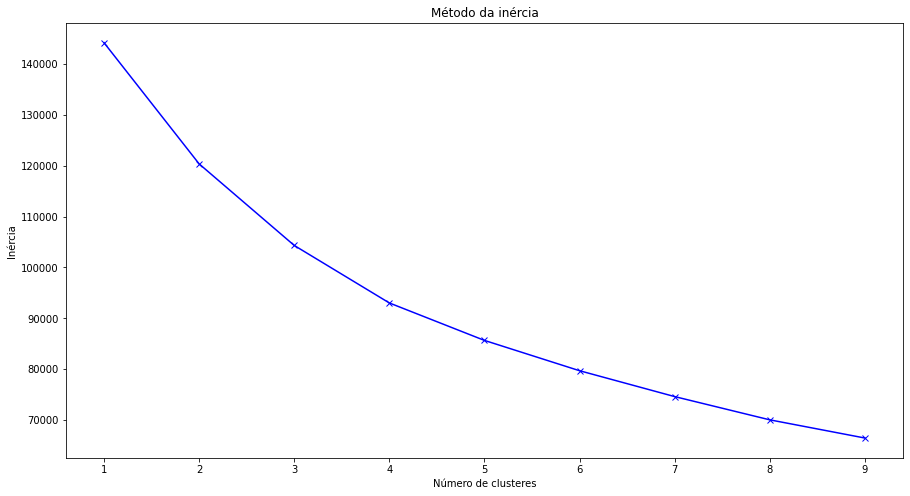

In [12]:
fig = plt.figure(figsize = (15,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Número de clusteres')
plt.ylabel('Inércia')
plt.title('Método da inércia')
plt.show()

### 3.2 Método da silhueta para seleção do número de clusters

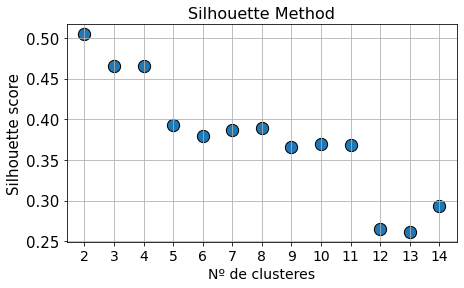

In [13]:
#Library Import 

from sklearn import metrics 
from sklearn.metrics import silhouette_score, v_measure_score 
from sklearn.cluster import KMeans 

# Normalize 

scaler = StandardScaler()
normalized_df = scaler.fit_transform(df1)

alvo = df1 
max = 15 
km_silhouette = [] 
km_scores = []

for i in range(2, max): 

  km = KMeans(n_clusters=i, random_state=0).fit(alvo) 
  preds = km.predict(alvo) 
  km_scores.append(-km.score(alvo)) 
  silhouette = silhouette_score(alvo, preds) 
  km_silhouette.append(silhouette) 
  
# Plotagem do método da Silhouette (Silhueta) 

plt.figure(figsize=(7,4)) 
plt.title("Silhouette Method",fontsize=16) 
plt.scatter(x=[i for i in range(2,max)],y=km_silhouette,s=150,edgecolor='k') 
plt.grid(True) 
plt.xlabel("Nº de clusteres",fontsize=14) 
plt.ylabel("Silhouette score",fontsize=15) 
plt.xticks([i for i in range(2,max)],fontsize=14) 
plt.yticks(fontsize=15) 
plt.show()

### 3.3 PCA e Mistura Gaussiana

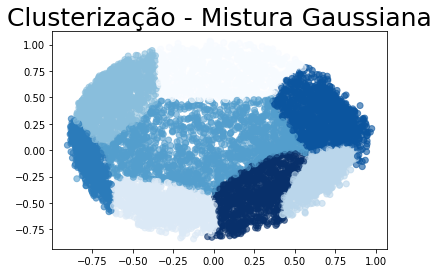

In [15]:
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.mixture import GaussianMixture 
from sklearn.decomposition import PCA 

normalized_df = normalize(normalized_df,axis=1) 

pca = PCA(n_components=2)

X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

# Plotagem da clusterização (em 2D) 

plt.title('Clusterização - Mistura Gaussiana',fontsize=25) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = GaussianMixture(n_components = 8).fit_predict(X_principal), alpha = 0.6,cmap='Blues')
plt.show()

In [16]:
# Selecionando 4 clusteres

model = KMeans(4,random_state=42) #aqui treinamos o modelo
labels = model.fit_predict(normalized_df) #lembre-se de treinar com os dados normalizados

In [ ]:
df1['clusters'] = labels 
df1['clusters'] = df1['clusters'].astype(str)

### 3.4 Análise dos clusteres - gráficos de boxplot



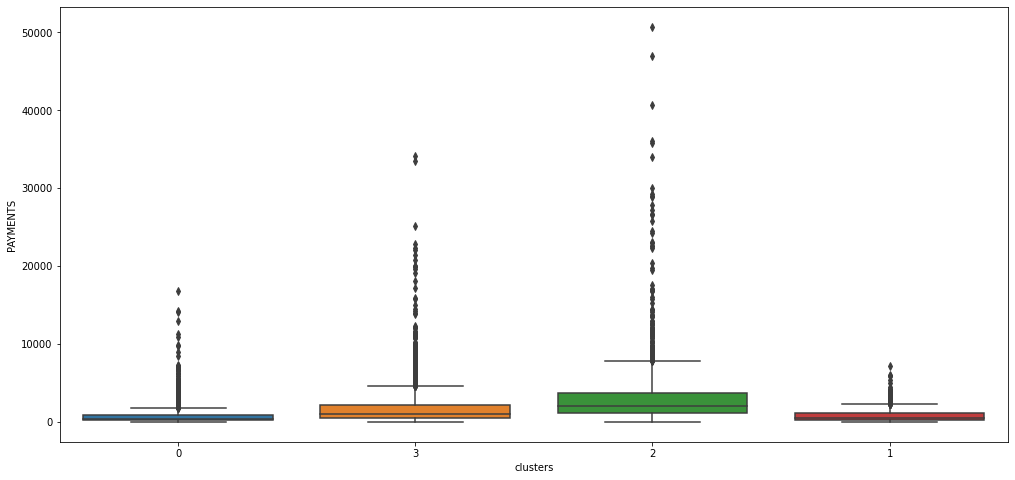

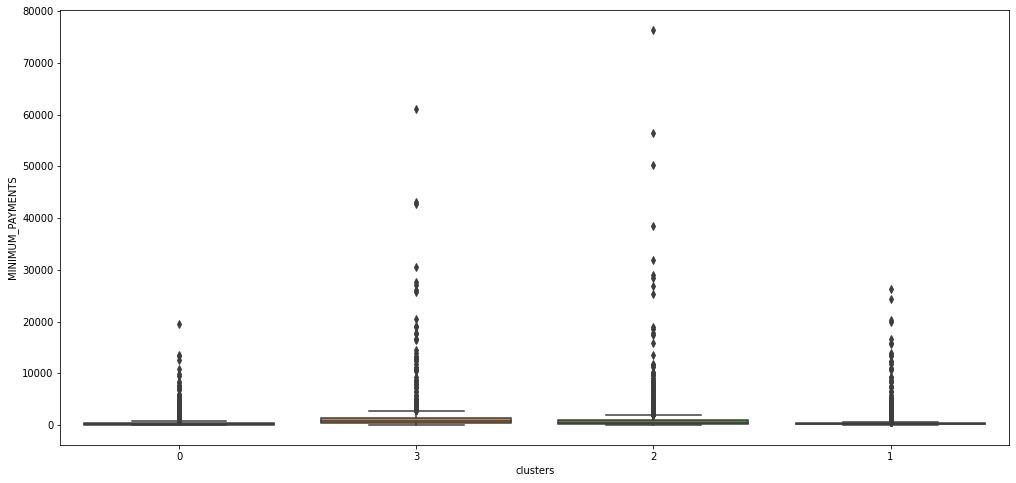

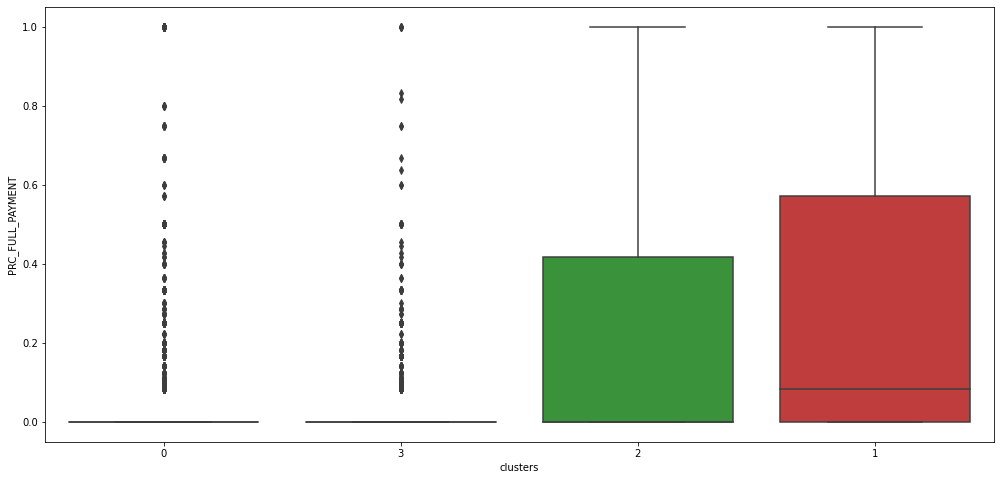

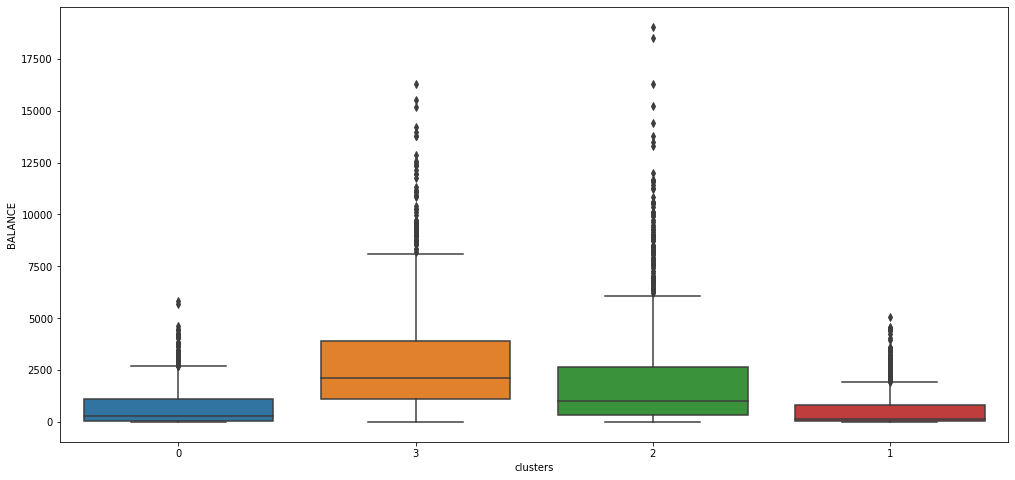

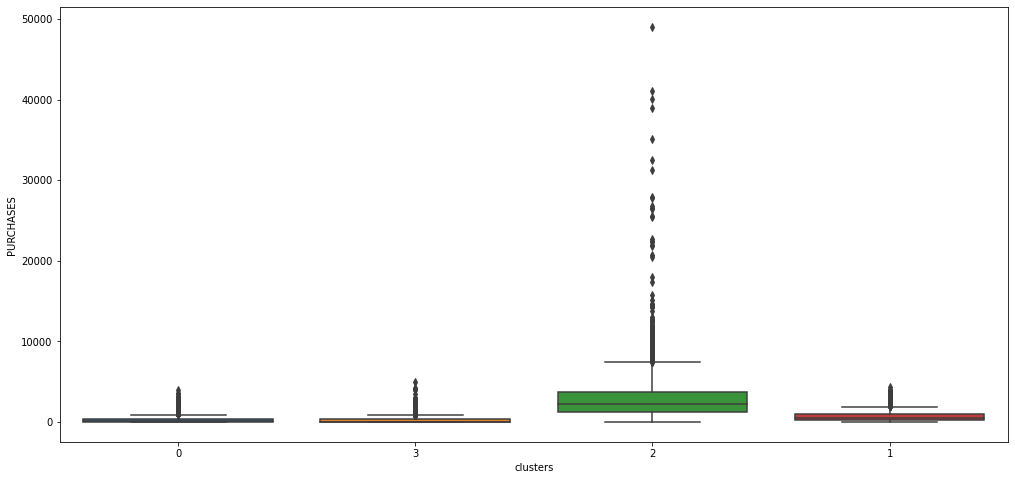

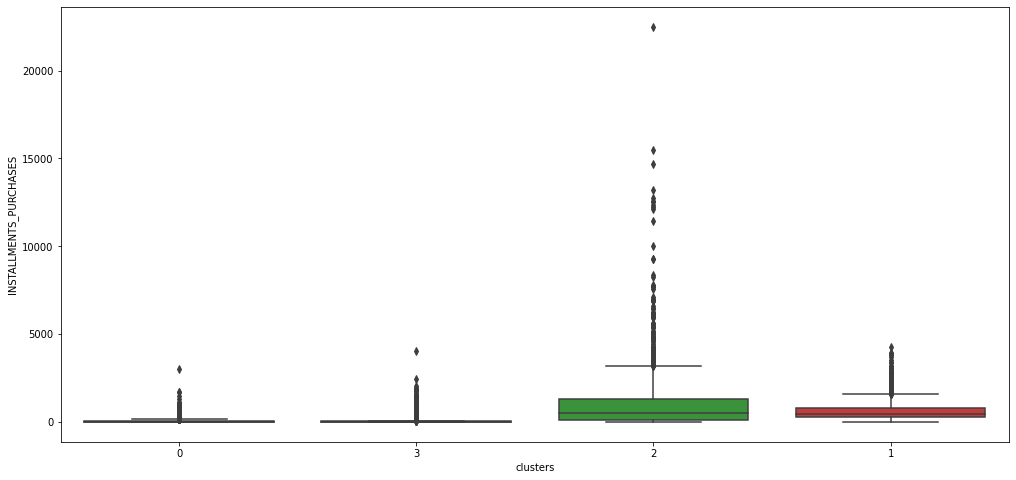

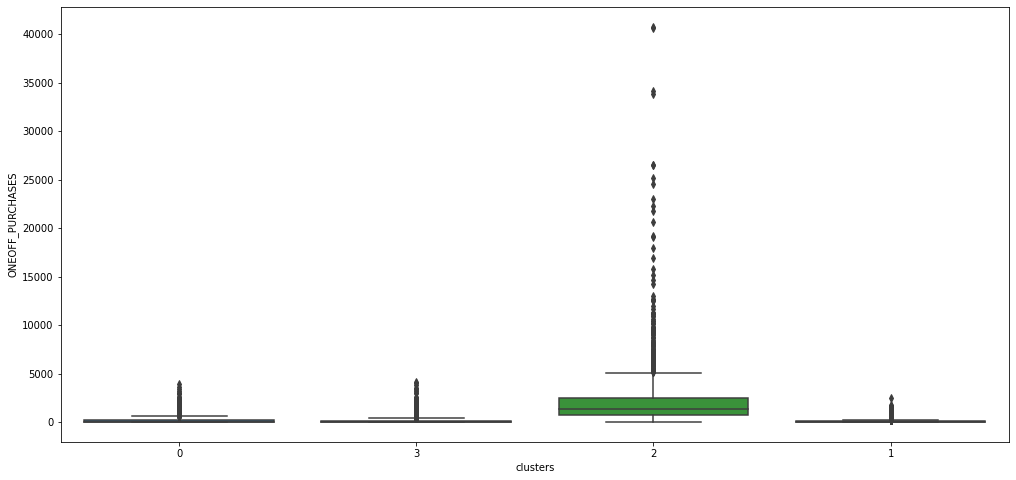

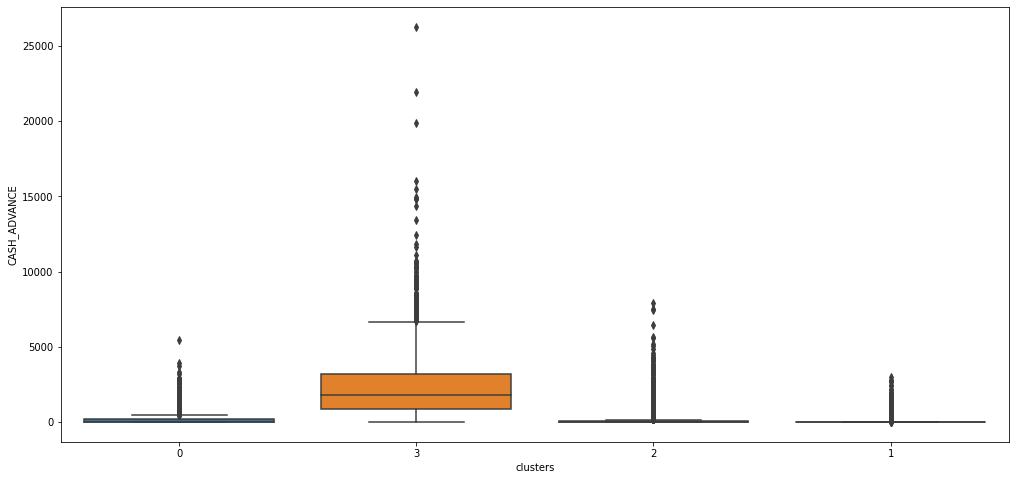

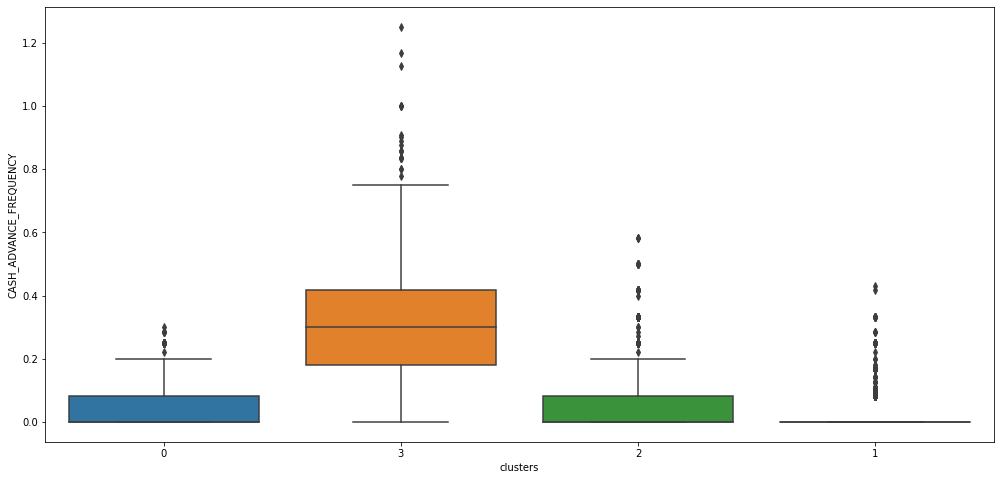

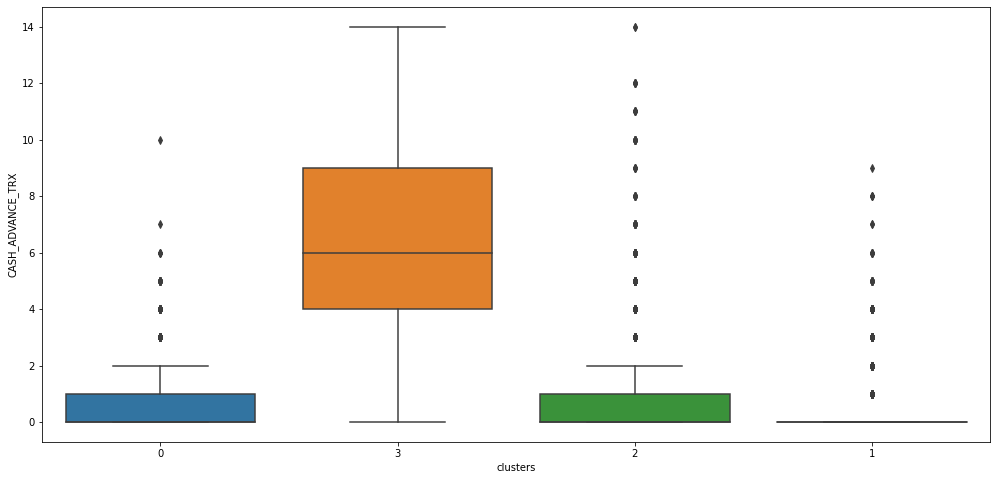

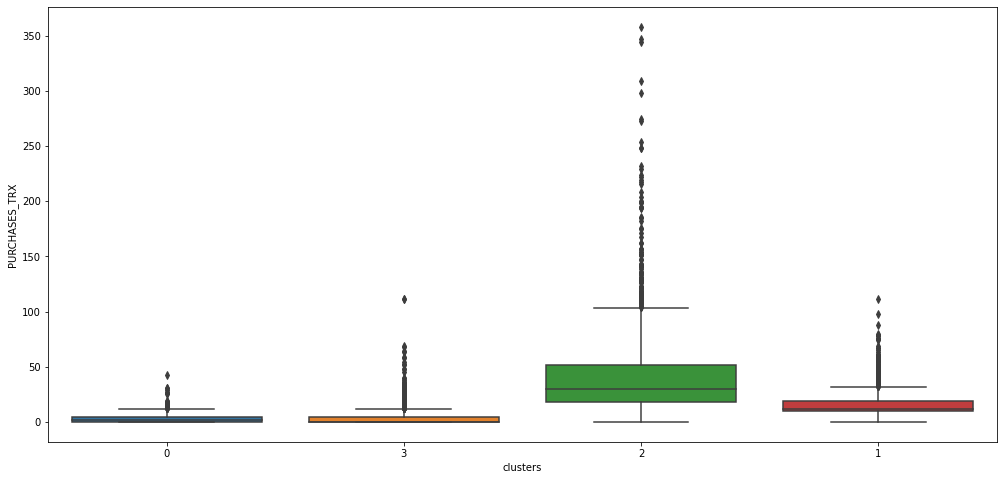

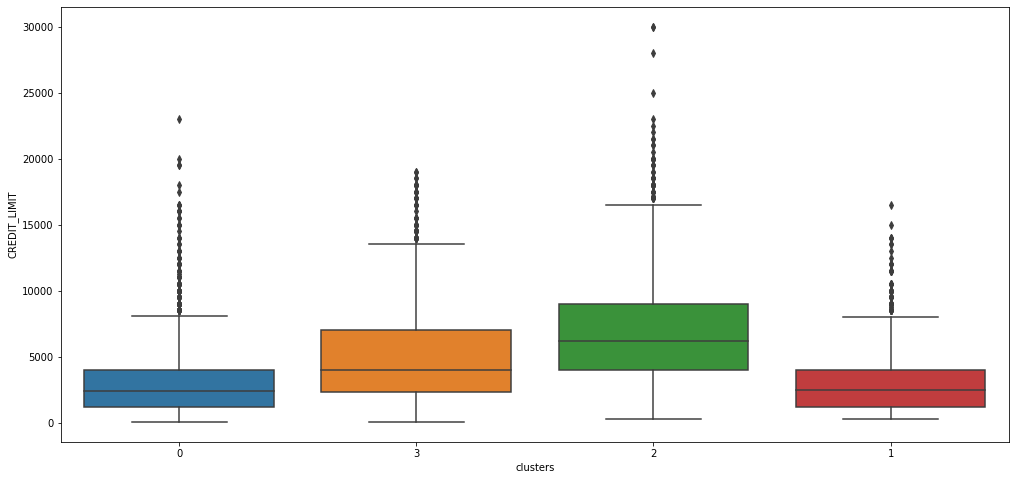

In [18]:
cols = ['PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'ONEOFF_PURCHASES', 
        'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT']

for y in cols:

  fig = plt.figure(figsize = (17,8))
  sns.boxplot(x="clusters", y=y, data=df1)
  plt.show()


### 3.5 Resultados

A análise de clusteres revela, apesar da quantidade elevada de outliers inter-clusteres, a existência de 4 perfis de clientes, sendo eles:

1. Cliente que possui compras com valor e quantidade reduzidos, além de não efetuar pagamento adiantado.
2. Cliente que não efetua pagamento adiantado, porém efetua comprar com alto valor e em alta quantidade.
3. Cliente que efetua compras em quantidade normal, e não paga adiantado.
4. Cliente que compra em quantidade e valor reduzidos, porém sempre paga adiantado.

Com esse tipo de perfilamento de clientes, as empresas podem utilizar essa informação para efetuar campanhas de marketing direcionado, estratégias de retenção de clientes e liberação de crédito, por exemplo.

## 4. Regressão - 2ª etapa

In [33]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

colunas = list(df1.columns)
colunas.remove('clusters')

normalized_df = pd.DataFrame(normalized_df, columns = colunas)

X = normalized_df.drop(columns = 'CREDIT_LIMIT')
y = normalized_df['CREDIT_LIMIT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=11)

regr = MLPRegressor(max_iter=500).fit(X_train, y_train)
y_pred = regr.predict(X_test)

# M´tericas de avaliação de performance

print(f'MSE = {mean_squared_error(y_pred, y_test)}')
print(f'MAE = {mean_absolute_error(y_pred, y_test)}')
print(f'R² = {r2_score(y_pred, y_test)}')

MSE = 0.03232964232167437
MAE = 0.13739627546215843
R² = 0.13694841989720385
